In [1]:
import torch
import os
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from network import CharacterClassifier
from tqdm import tqdm
from training_data import HASY
from PIL import Image
from matplotlib import pyplot as plt

hasy_train = HASY('HASY')
hasy_test = HASY('HASY', train=False)

print("Train data length: {0}".format(len(hasy_train.data)))
print("Test data length: {0}".format(len(hasy_test.data)))
print("Img Shape: {0}".format(hasy_train.data[0].shape))
print("Number of Labels: {0}".format(hasy_train.no_labels))

100%|██████████| 16992/16992 [00:00<00:00, 72307.15it/s] 

Train data length: 5690
Test data length: 644
Img Shape: torch.Size([1, 28, 28])
Number of Labels: 15


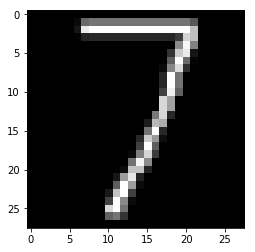

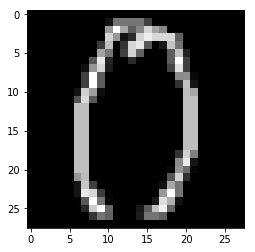

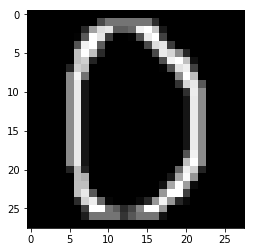

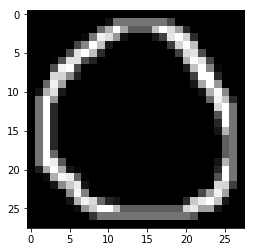

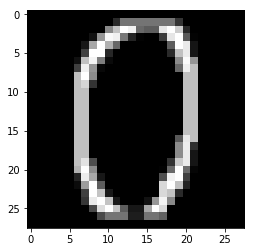

In [2]:
from torchvision import transforms
for i in range(5):
    test_img = transforms.ToPILImage()(hasy_train.data[i])
    plt.imshow(test_img, cmap='gray')
    plt.show()

In [ ]:
# Train with a pretrained model from PyTorch
from torchvision import models
from torch.nn import Conv2d

pretrained = False
torch_model = models.densenet201(num_classes=15)
torch_model.features.conv0 = Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
if pretrained:
    torch_model.load_state_dict(torch.load('pretrained-model-01.ckpt'))
epochs = 55
optimizer = torch.optim.Adam(torch_model.parameters(), lr=0.001, betas=(0.8, 0.925), weight_decay=0.01)
criterion = nn.CrossEntropyLoss()

def calc_accuracy(model):
    accuracies = []
    for idx, [x_test, y_test] in enumerate(test_loader):
        test_pred = model(x_test)
        accuracy = 100 * torch.mean((torch.argmax(test_pred, dim=1) == y_test).float())
        accuracies.append(accuracy)
    return np.mean(accuracies)

train_loader = DataLoader(hasy_train, batch_size=16, shuffle=True)
test_loader = DataLoader(hasy_test, batch_size=16, shuffle=False)

for epoch in range(epochs):
        print("Epoch {0}".format(epoch))
        for step, [x_train, y_train] in enumerate(tqdm(train_loader)):
            optimizer.zero_grad()
            train_pred = torch_model(x_train)
            loss = criterion(train_pred, y_train)
            loss.backward()
            optimizer.step()
            if step % 50 == 0:
                print('Loss: {}'.format(loss))
                acc = calc_accuracy(torch_model)       
                print("Accuracy: {0}".format(acc)) 
                if acc > 80:
                    torch.save(torch_model.state_dict(), 'model_acc_{0}.ckpt'.format(acc))

  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 0
Loss: 2.7665889263153076


  0%|          | 1/356 [00:12<1:15:29, 12.76s/it]

Accuracy: 48.17073059082031


 14%|█▍        | 50/356 [01:27<06:32,  1.28s/it] 

Loss: 1.348706603050232


 14%|█▍        | 51/356 [01:46<34:04,  6.70s/it]

Accuracy: 45.88414764404297


 28%|██▊       | 100/356 [02:54<06:03,  1.42s/it]

Loss: 0.9000043869018555


 28%|██▊       | 101/356 [03:13<28:30,  6.71s/it]

Accuracy: 46.49390411376953


 42%|████▏     | 150/356 [04:24<04:57,  1.44s/it]

Loss: 1.0524007081985474


 42%|████▏     | 151/356 [04:43<22:56,  6.71s/it]

Accuracy: 41.31097412109375


 56%|█████▌    | 200/356 [05:58<04:07,  1.59s/it]

Loss: 0.5621466636657715


 56%|█████▋    | 201/356 [06:20<19:28,  7.54s/it]

Accuracy: 43.29268264770508


 70%|███████   | 250/356 [07:36<02:41,  1.53s/it]

Loss: 0.7453612685203552


 71%|███████   | 251/356 [07:56<12:28,  7.13s/it]

Accuracy: 47.25609588623047


 84%|████████▍ | 300/356 [09:12<01:23,  1.50s/it]

Loss: 0.6279917359352112


 85%|████████▍ | 301/356 [09:34<07:08,  7.79s/it]

Accuracy: 43.44512176513672


 98%|█████████▊| 350/356 [11:11<00:10,  1.70s/it]

Loss: 0.5150227546691895


 99%|█████████▊| 351/356 [11:32<00:37,  7.55s/it]

Accuracy: 40.85365676879883


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 1
Loss: 0.7551416754722595


  0%|          | 1/356 [00:20<2:01:12, 20.49s/it]

Accuracy: 42.07316970825195


 14%|█▍        | 50/356 [01:35<07:34,  1.49s/it] 

Loss: 0.7647292613983154


 14%|█▍        | 51/356 [01:55<35:11,  6.92s/it]

Accuracy: 46.79878234863281


 28%|██▊       | 100/356 [03:16<06:14,  1.46s/it]

Loss: 0.5705273151397705


 28%|██▊       | 101/356 [03:43<38:56,  9.16s/it]

Accuracy: 53.65853500366211


 29%|██▉       | 105/356 [03:51<15:18,  3.66s/it]